# Prompt length
Computed on expanded and de-punctuated prompts
- count tokens for each prompt
- average token count per user
- average token count per gender

TODO: remove wrongly classified prompts manually??


In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../../giicg.db")
prompts = pd.read_sql("Select * from expanded_prompts", conn)
conn.close()
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language
0,1,1,user,"parsing data from python iterator, how it coul...","parsing data from python iterator, how it coul...",,,Man (cisgender),6,en
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large .mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en
...,...,...,...,...,...,...,...,...,...,...
756,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code. I want to: Get nodes and edge...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92,en
757,1845,37,user,\n nun möchte ich judgement balancing m...,Now I want to bring judgement balancing into t...,,,Woman (cisgender),29,de
758,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,I do not see any change in the plot.,,,Woman (cisgender),29,de
759,1849,2,user,\n I am working on the problem of reconstru...,\n I am working on the problem of reconstru...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8,en


In [3]:
from helpers.normalization import remove_punctuation_and_newlines

prompts['conversational'] = prompts['conversational'].apply(remove_punctuation_and_newlines)
prompts

,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language
0,1,1,user,"parsing data from python iterator, how it coul...",parsing data from python iterator how it could...,,,Man (cisgender),6,en
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en
...,...,...,...,...,...,...,...,...,...,...
756,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code I want to Get nodes and edges ...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92,en
757,1845,37,user,\n nun möchte ich judgement balancing m...,Now I want to bring judgement balancing into t...,,,Woman (cisgender),29,de
758,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,I do not see any change in the plot,,,Woman (cisgender),29,de
759,1849,2,user,\n I am working on the problem of reconstru...,I am working on the problem of reconstruc...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8,en


In [4]:
import spacy
tokenizer = spacy.blank("en")
prompts['token_count'] = prompts['conversational'].apply(lambda x: len(tokenizer(x)) if isinstance(x, str) else 0)
prompts


,message_id,conversation_id,role,message_text,conversational,code,other,gender,user_id,language,token_count
0,1,1,user,"parsing data from python iterator, how it coul...",parsing data from python iterator how it could...,,,Man (cisgender),6,en,17
1,730,32,user,Write python function to do operations with in...,Write python function to do operations with in...,,report_dt\tsource\tmetric_name\tmetric_num\tme...,Man (cisgender),6,en,118
2,1133,55,user,Write shortest tutorial on creating RAG on ema...,Write shortest tutorial on creating RAG on ema...,,,Man (cisgender),6,en,9
3,1135,55,user,what is FAISS,what is FAISS,,,Man (cisgender),6,en,3
4,1137,55,user,Transform given code to process large .mbox file,Transform given code to process large mbox file,,Transform given code to process large .mbox file,Man (cisgender),6,en,8
...,...,...,...,...,...,...,...,...,...,...,...
756,1646,82,user,"def run_query(query, n_results):\n query_em...",this is my code I want to Get nodes and edges ...,"def run_query(query, n_results):\n query_em...",,Man (cisgender),92,en,51
757,1845,37,user,\n nun möchte ich judgement balancing m...,Now I want to bring judgement balancing into t...,,,Woman (cisgender),29,de,53
758,1847,37,user,\n ich sehe keine veränderung im Plot. Was ...,I do not see any change in the plot,,,Woman (cisgender),29,de,9
759,1849,2,user,\n I am working on the problem of reconstru...,I am working on the problem of reconstruc...,,Classic CV - Drone navigation\nIf you ever tho...,Man (cisgender),8,en,26


In [4]:
import pandas as pd
import numpy as np

# Compute Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = prompts['token_count'].quantile(0.10)
Q3 = prompts['token_count'].quantile(0.90)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prompts[(prompts['token_count'] < lower_bound) | (prompts['token_count'] > upper_bound)]

print(f"Outliers (based on IQR):\n{outliers[['conversational', 'token_count']]}")


Outliers (based on IQR):
                                        conversational  token_count
1    Write python function to do operations with in...          142
59   I have a dataframe with columns "claim" and "d...          100
72   as a NLP and LLM researcher, I am recently dow...           92
103  I have a list of colors from colorhunt.co thes...           85
167  okay now a somewhat complicated question, I ha...           81
181  so and now comes the actual function, I want t...           82
220  here i have my model which uses concatination ...          130
228  now i want to do some early fusion, starting w...          106
478  we found the dataset on the website of the uni...          285
515  Uploaded a fileThis project is a Python implem...          212
563  I have a programming project and need help: Th...           88
586  A programming question, object oriented progra...           90
637  hey, I'm writing an application. Because I wan...           95
667  ok, lets create a 

/var/folders/w6/f5trsq6n2jx87f1mqgd_4vv80000gn/T/ipykernel_10537/2957431194.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='token_count', data=user_avg_tokens, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})


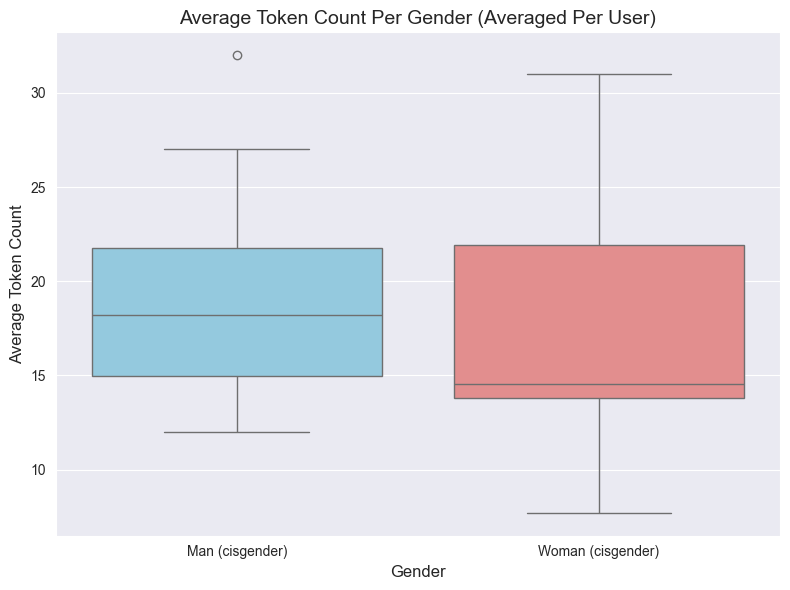

,user_id,gender,token_count,no_messages
0,6,Man (cisgender),22.333333,9
1,8,Man (cisgender),19.500000,2
2,11,Woman (cisgender),17.636364,11
3,15,Man (cisgender),12.000000,3
4,16,Woman (cisgender),21.920000,25
5,25,Man (cisgender),27.000000,4
6,28,Woman (cisgender),25.863636,22
7,29,Woman (cisgender),31.000000,2
8,31,Man (cisgender),18.600000,5
9,34,Man (cisgender),20.045455,66


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_prompts = prompts[
    (prompts['gender'].isin(['Man (cisgender)', 'Woman (cisgender)'])) &
    (prompts['user_id'] != 81) # excluded this for now, since an error message is present in one prompt which needs te be filtered out
]


# Calculate average token count per user
user_avg_tokens = (
    filtered_prompts
    .groupby(['user_id', 'gender'])
    .agg(token_count=('token_count', 'mean'),  # Average token count per user
         no_messages=('token_count', 'count'))  # Number of rows per user
    .reset_index()
)


# Create a boxplot for average token count per gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='token_count', data=user_avg_tokens, palette={'Man (cisgender)': 'skyblue', 'Woman (cisgender)': 'lightcoral'})
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Token Count', fontsize=12)
plt.title('Average Token Count Per Gender (Averaged Per User)', fontsize=14)
plt.tight_layout()
plt.show()



user_avg_tokens


## T-test

In [6]:
from scipy.stats import ttest_ind, shapiro

men_token_counts = user_avg_tokens[user_avg_tokens['gender'] == 'Man (cisgender)']['token_count']
women_token_counts = user_avg_tokens[user_avg_tokens['gender'] == 'Woman (cisgender)']['token_count']

# Test normality for men's token counts
shapiro_men = shapiro(men_token_counts)
print("Shapiro-Wilk test for men:")
print(f"Statistic: {shapiro_men.statistic}, p-value: {shapiro_men.pvalue}")

# Test normality for women's token counts
shapiro_women = shapiro(women_token_counts)
print("\nShapiro-Wilk test for women:")
print(f"Statistic: {shapiro_women.statistic}, p-value: {shapiro_women.pvalue}")

# Interpretation
alpha = 0.05
if shapiro_men.pvalue > alpha:
    print("\nMen's group looks normal (fail to reject H0)")
else:
    print("\nMen's group is NOT normal (reject H0)")

if shapiro_women.pvalue > alpha:
    print("Women's group looks normal (fail to reject H0)")
else:
    print("Women's group is NOT normal (reject H0)")


# Perform an independent t-test (equal_var=False assumes unequal variances)
t_stat, p_value = ttest_ind(men_token_counts, women_token_counts, equal_var=False)

# Print the results
print("T-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Shapiro-Wilk test for men:
Statistic: 0.9342512753986311, p-value: 0.3496328922615152

Shapiro-Wilk test for women:
Statistic: 0.9095085796738218, p-value: 0.1805669068508728

Men's group looks normal (fail to reject H0)
Women's group looks normal (fail to reject H0)
T-test Results:
T-statistic: 0.7247580717672057
P-value: 0.4756881608770933
